### Ciência de Dados com Python/IA - SENAI-DF - Vespertino - Marcelo Pereira Avelino - Semana Estatística - 26/08/2024 à 30/08/2024

# Análise de Dados de Imigração no Canadá (1980-2013)

### 1. **Instalação e Configuração do Ambiente**

Antes de iniciar a análise, é importante garantir que as bibliotecas necessárias estejam instaladas no seu ambiente de trabalho.

In [52]:
# Instalação das bibliotecas essenciais
! pip install pandas
! pip install matplotlib

### 2. **Importando as Bibliotecas Essenciais**

In [53]:
# Importando as bibliotecas essenciais para análise e visualização de dados
import pandas as pd  # Utilizada para manipulação e análise de dados estruturados em Python.
import matplotlib.pyplot as plt  # Usada para criar gráficos e visualizações de dados.

### 3. **Carregando o Dataset**

Para começar a análise, o primeiro passo é carregar os dados de imigração a partir do arquivo CSV.

In [54]:
# Importando o dataset 'imigrantes_canada.csv' para o DataFrame 'df_ic'
df_ic = pd.read_csv('dataset/imigrantes_canada.csv')

# Exibindo o DataFrame 'df_ic' carregado
df_ic.head()  # Exibe as primeiras linhas do DataFrame para revisão inicial

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


### 4. **Exploração Inicial dos Dados**

Após carregar os dados, é essencial explorar o conteúdo e a estrutura do DataFrame.

In [55]:
# Verificando informações gerais do DataFrame
df_ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

Este comando fornece um resumo técnico do DataFrame `df_ic`.

Ele exibe informações como o número total de entradas, o nome e o tipo de cada coluna, o número de valores não nulos em cada coluna e a quantidade de memória usada pelo DataFrame.

- **Classe**: O DataFrame é do tipo `<class 'pandas.core.frame.DataFrame'>`.
- **Tamanho do Índice**: O DataFrame possui 195 entradas, variando de 0 a 194.
- **Colunas**: Há um total de 38 colunas, sendo que as primeiras três colunas (País, Continente, Região) são do tipo object, ou seja, contêm dados categóricos ou strings. As outras 35 colunas, que representam os anos de 1980 a 2013 e a coluna Total, são do tipo int64, armazenando números inteiros.
- **Valores Nulos**: Nenhuma das colunas contém valores nulos, ou seja, todas as 195 entradas possuem valores válidos.
- **Uso de Memória**: O DataFrame ocupa aproximadamente 58.0 KB de memória.

Essas informações são essenciais para entender a estrutura e o conteúdo dos dados antes de realizar qualquer análise.

In [56]:
# Exibindo o tipo de dados do DataFrame
type(df_ic)

pandas.core.frame.DataFrame

### 5. **Ajustando o Índice do DataFrame**

In [57]:
# # Definir o país como índice para o DataFrame 'df_ic', alterando a estrutura original.
# Isso facilita o acesso e filtragem dos dados por país, como por exemplo, filtrar pelo país 'Brasil'.
# O argumento 'inplace=True' faz a alteração diretamente no DataFrame original, alterando sua estrutura.
df_ic.set_index('País', inplace=True)

# Mostrar os primeiros registros do DataFrame para verificar as alterações
df_ic.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


### 6. **Filtrando Dados e Criando Variáveis**

Vamos criar a variável chamada `anos` e utilizar a função `map` para aplicar a função `str` a cada item no intervalo de 1980 a 2013, convertendo-os para strings.

Em seguida, o resultado será convertido em uma lista com a função `list`, com o nome de `anos`, armazenando os anos como strings.

In [58]:
# 'Iteração', 'Looping', e 'Repetição' referem-se ao processo de passar por uma sequência de elementos (como números, strings, etc.) e executar uma operação em cada um deles.
anos = list(map(str, range(1980, 2014)))

# Exibir a lista de anos
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### 7. **Extração de Séries de Dados**

Vamos extrair os dados de imigração específicos para o país `Brasil`.

In [59]:
# Extrair a série de dados da coluna 'Brasil' utilizando a função loc, que é utilizada para localizar dados pelo label|rótulo|nome|índice das linhas ou colunas.
brasil = df_ic.loc['Brasil', anos]

# Exibir a série de dados extraída
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brasil, dtype: object

### 8. **Conversões Entre Estruturas de Dados**

Transformaremos a série de dados em um dicionário para facilitar a manipulação posterior.

In [60]:
# Criar um dicionário através da Série 'brasil'
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}

# Apresentando o dicionário criado
brasil_dict

{'ano': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'imigrantes': [np.int64(211),
  np.int64(220),
  np.int64(192),
  np.int64(139),
  np.int64(145),
  np.int64(130),
  np.int64(205),
  np.int64(244),
  np.int64(394),
  np.int64(650),
  np.int64(650),
  np.int64(877),
  np.int64(1066),
  np.int64(866),
  np.int64(566),
  np.int64(572),
  np.int64(586),
  np.int64(591),
  np.int64(531),
  np.int64(626),
  np.int64(845),
  np.int64(847),
  np.int64(745),
  np.int64(839),
  np.int64(917),
  np.int64(969),
  np.int64(1181),
  np.int64(1746),
  np.int64(2138),
  np.int64(2509),
  np.int64(2598),
  np.int64(1508),
  np.int64(1642),
  np.int64(1714)]}

### 9. **Criação de um DataFrame a Partir do Dicionário**

Agora, transformaremos o dicionário em um DataFrame.

In [61]:
# Transformar o dicionário 'brasil_dict' em um DataFrame somente com valores do Brasil
df_brasil = pd.DataFrame(brasil_dict)

# Exibindo o DataFrame criado
df_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


### 10. **Visualização Gráfica**

Com os dados organizados, podemos criar gráficos para visualizar a evolução dos imigrantes brasileiros no Canadá.

#### 10.1 **Criando o gráfico de linhas para demonstrar a evolução da imigração de brasileiros para o Canadá de 1980 a 2013**

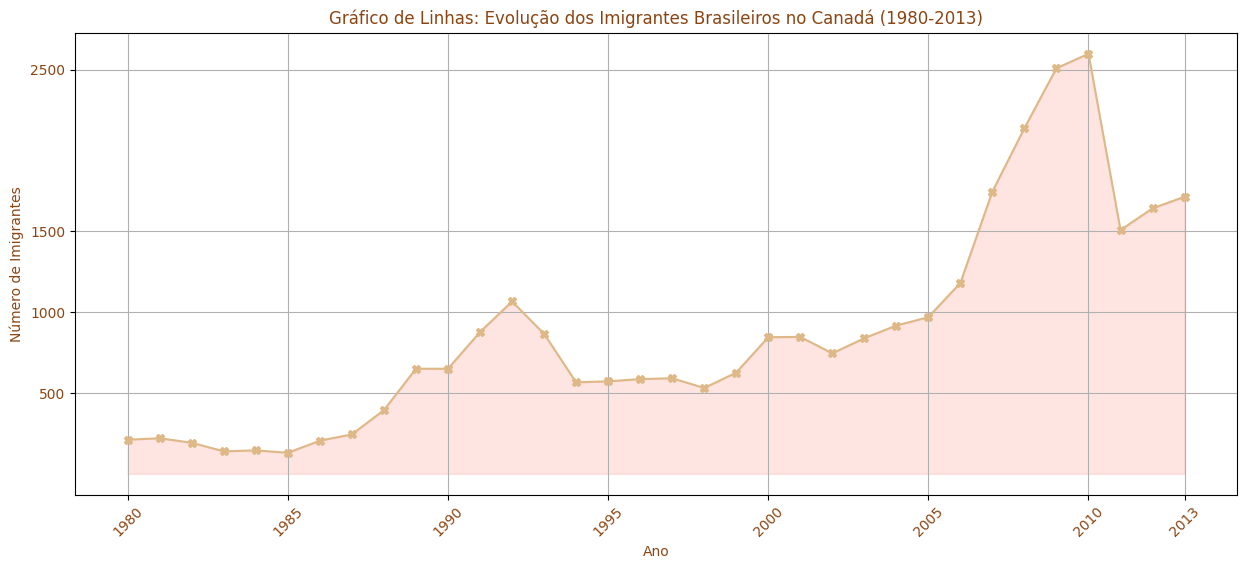

In [62]:
# Configurando o tamanho da figura
# figsize define o tamanho da figura em polegadas (largura x altura)
plt.figure(figsize=(15,6))  # 15 polegadas de largura e 6 polegadas de altura
    # Conversão de polegadas para centímetros:
    # 1 polegada = 2.54 cm
    # largura: 15 polegadas x 2.54 = 38,1 cm
    # altura: 6 polegadas x 2,54 = 15,24 cm
    # DPI (dots per inch, ou pontos por polegada) define a resolução da imagem.
    # O padrão no matplotlib é DPI = 100.
    # Largura: 15 polegadas x 100 DPI = 1500 pixels
    # Altura: 6 polegadas x 100 DPI = 600 pixels

# Criando o gráfico de linhas
# plt.plot é usado para plotar gráficos de linhas
# df_brasil['ano'] são os dados do eixo x (anos) e df_brasil['imigrantes'] são os dados do eixo y (número de imigrantes)
# color define a cor da linha e marker define o marcador para os pontos de dados
plt.plot(df_brasil['ano'], df_brasil['imigrantes'], color='burlywood', marker='X')

# Rotacionando os rótulos do eixo x para melhorar a legibilidade
# plt.xticks(rotation=45) rotaciona os rótulos do eixo x em 45 graus
plt.xticks(rotation=45)

# Definindo os rótulos específicos e a cor dos rótulos no eixo x
# plt.xticks() também é usado para definir os rótulos de eixo x e a cor dos rótulos
plt.xticks(['1980','1985','1990','1995','2000','2005','2010','2013'], color = 'saddlebrown')

# Definindo os valores e a cor dos rótulos no eixo y
# plt.yticks() define os valores mostrados no eixo y e a cor dos rótulos
plt.yticks([500,1000,1500,2500,3000], color = 'saddlebrown')

# Preenchendo a área abaixo da curva
# plt.fill_between() preenche a área entre a linha do gráfico e o eixo x
# alpha define a transparência da cor de preenchimento
plt.fill_between(df_brasil['ano'], df_brasil['imigrantes'], color='salmon', alpha=0.2)

# Adicionando uma grade ao gráfico
# plt.grid(True) adiciona uma grade ao gráfico para melhorar a visualização
plt.grid(True)

# Definindo o título e os rótulos dos eixos com cores específicas
# plt.title() define o título do gráfico e sua cor
# plt.xlabel() e plt.ylabel() definem os rótulos dos eixos x e y, respectivamente, e suas cores
plt.title("Gráfico de Linhas: Evolução dos Imigrantes Brasileiros no Canadá (1980-2013)", color = 'saddlebrown')
plt.xlabel('Ano', color = 'saddlebrown')
plt.ylabel('Número de Imigrantes', color = 'saddlebrown')

# Salvando o gráfico como uma imagem PNG
# plt.savefig() salva o gráfico no formato e no caminho especificados
plt.savefig('Material de Apoio/grafico_linhas_imigrantes_brasil.png')

# Mostrando o gráfico
# plt.show() exibe o gráfico na tela
plt.show()

#### 10.2 **Criando o Boxplot para demonstrar a distribuição do número de imigrantes do Brasil para o Canadá no período de 1980 a 2013.**

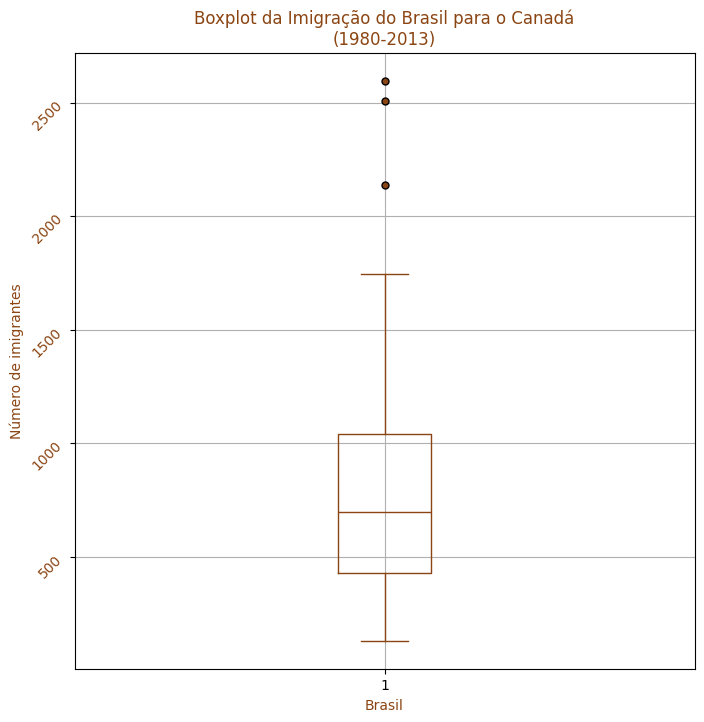

In [63]:
# A função plt.figure() cria uma nova figura. O parâmetro figsize define o tamanho da figura que terá 8 polegadas de largura e 8 polegadas de altura.
plt.figure(figsize=(8,8))

# Criando o boxplot para a coluna 'imigrantes' do DataFrame 'df_brasil', com a cor 'saddlebrown' para as linhas.
# plt.boxplot() cria o boxplot. Diversos parâmetros são utilizados para customizar as propriedades visuais do boxplot:
# boxprops - Propriedades da caixa do boxplot (cor, etc.).
# whiskerprops - Propriedades dos "bigodes" (linhas que se estendem da caixa).
# capprops - Propriedades das extremidades dos bigodes.
# medianprops - Propriedades da linha que representa a mediana.
# flierprops - Propriedades dos pontos que representam os outliers.
plt.boxplot(df_brasil['imigrantes'], 
            boxprops=dict(color='saddlebrown'),  # Define a cor da caixa do boxplot.
            whiskerprops=dict(color='saddlebrown'),  # Define a cor dos bigodes.
            capprops=dict(color='saddlebrown'),  # Define a cor das extremidades dos bigodes.
            medianprops=dict(color='saddlebrown'),  # Define a cor da linha da mediana.
            flierprops=dict(markerfacecolor='saddlebrown', marker='o', markersize=5, linestyle='none'))  # Define a cor e o estilo dos outliers.

# Adicionando um título ao gráfico para descrever o conteúdo exibido
# plt.title() adiciona um título ao gráfico. O parâmetro color define a cor do texto do título. 
# "\n" é utilizado para quebrar a linha dentro do título, permitindo um layout mais organizado.
plt.title("Boxplot da Imigração do Brasil para o Canadá\n(1980-2013)", color='saddlebrown')

# Adicionando um rótulo ao eixo x, que representa o país 'Brasil', para identificar os dados representados.
# plt.xlabel() define o rótulo do eixo x.
plt.xlabel('Brasil', color='saddlebrown')

# Adicionando um rótulo ao eixo y, que representa o número de imigrantes, para identificar os valores representados.
# plt.ylabel() define o rótulo do eixo y.
plt.ylabel('Número de imigrantes', color='saddlebrown')

# Definindo os rótulos no eixo y para facilitar a leitura dos valores apresentados.
# plt.yticks() define os ticks (marcadores) no eixo y e suas cores.
plt.yticks([500,1000,1500,2000,2500], color='saddlebrown')

# Rotacionando os rótulos do eixo y em 45 graus para melhorar a legibilidade.
# plt.yticks(rotation=45) rotaciona os rótulos do eixo y.
plt.yticks(rotation=45)

# Adicionando uma grade ao gráfico.
# plt.grid(True) adiciona uma grade ao fundo do gráfico para facilitar a leitura dos valores.
plt.grid(True)

# Salvando o gráfico gerado como uma imagem PNG.
# plt.savefig() salva o gráfico no caminho e com o nome especificados.
plt.savefig('Material de Apoio/grafico_boxplot_imigrantes_brasil.png')

# Exibindo o gráfico na tela.
# plt.show() exibe o gráfico gerado na tela.
plt.show()

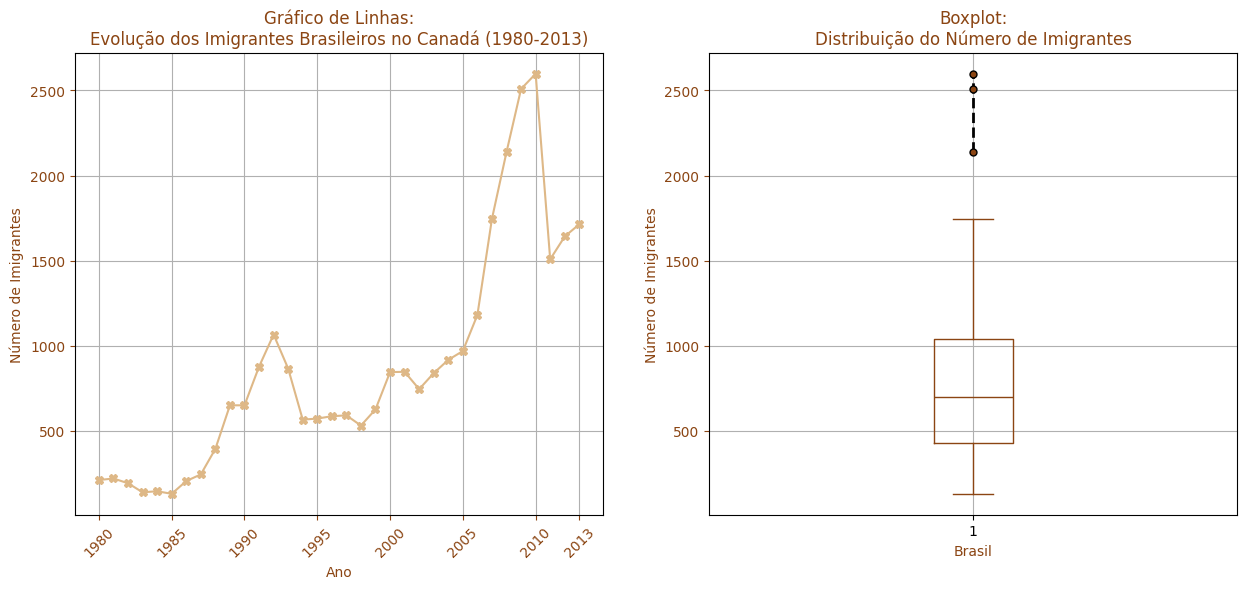

In [64]:
# Criando um subplot com dois gráficos lado a lado: um gráfico de linhas e um boxplot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # Define o tamanho da figura com 15 polegadas de largura e 6 de altura

# Gráfico de linhas: Evolução dos Imigrantes Brasileiros no Canadá (1980-2013)
ax[0].plot(df_brasil['ano'], df_brasil['imigrantes'], color='burlywood', marker='X')  # Define a cor e o marcador dos pontos
ax[0].set_title('Gráfico de Linhas:\nEvolução dos Imigrantes Brasileiros no Canadá (1980-2013)', color='saddlebrown')  # Título do gráfico
ax[0].set_xlabel('Ano', color='saddlebrown')  # Rótulo do eixo x
ax[0].set_ylabel('Número de Imigrantes', color='saddlebrown')  # Rótulo do eixo y
ax[0].grid(True)  # Adiciona grade ao gráfico

# Definindo os rótulos e rotacionamento do eixo x
ax[0].set_xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010', '2013'])  # Define os anos específicos no eixo x
ax[0].tick_params(axis='x', rotation=45, colors='saddlebrown')  # Rotaciona os rótulos do eixo x e define a cor
ax[0].tick_params(axis='y', colors='saddlebrown')  # Define a cor dos rótulos do eixo y

# Boxplot: Distribuição do Número de Imigrantes
ax[1].boxplot(df_brasil['imigrantes'], 
              boxprops=dict(color='saddlebrown'),  # Define a cor da caixa do boxplot
              whiskerprops=dict(color='saddlebrown'),  # Define a cor dos bigodes
              capprops=dict(color='saddlebrown'),  # Define a cor das extremidades dos bigodes
              medianprops=dict(color='saddlebrown'),  # Define a cor da linha da mediana
              flierprops=dict(markerfacecolor='saddlebrown', marker='o', markersize=5, lw=2, linestyle='--'))  # Define a cor e o estilo dos outliers
ax[1].set_title('Boxplot:\nDistribuição do Número de Imigrantes', color='saddlebrown')  # Título do gráfico
ax[1].set_xlabel('Brasil', color='saddlebrown')  # Rótulo do eixo x
ax[1].set_ylabel('Número de Imigrantes', color='saddlebrown')  # Rótulo do eixo y
ax[1].tick_params(axis='y', colors='saddlebrown')  # Define a cor dos rótulos do eixo y
ax[1].grid(True)  # Adiciona grade ao gráfico

# Salvando os gráficos como imagem
plt.savefig('Material de Apoio/grafico_e_boxplot_imigrantes_brasil.png')

# Mostrando os gráficos
plt.show()

Text(0.5, 0.98, 'Imigração dos Países da América Latina Para o Canadá (1980-2013)')

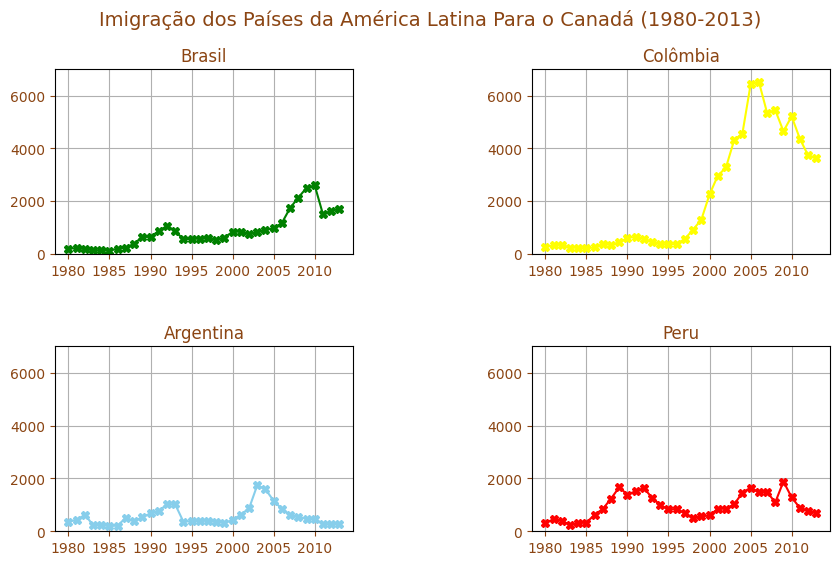

In [79]:
# Criar uma figura com 4 subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
# Define o layout dos subplots (2 linhas e 2 colunas) e o tamanho da figura em 10x6 polegadas

fig.subplots_adjust(hspace=0.5, wspace=0.6)
# Ajusta o espaçamento vertical (hspace) e horizontal (wspace) entre os subplots

# Brasil
axs[0, 0].plot(df_ic.loc['Brasil', anos], color='green', marker='X')
# Plota a linha correspondente ao Brasil, com os anos no eixo x e os dados de imigração no eixo y
# Define a cor da linha como verde e usa 'X' como marcador para os pontos

axs[0, 0].set_title('Brasil', color='saddlebrown')
# Define o título do subplot para "Brasil" e a cor do título como 'saddlebrown'

axs[0, 0].tick_params(axis='x', colors='saddlebrown')
# Configura a cor dos ticks (marcadores) e rótulos do eixo x como 'saddlebrown'

axs[0, 0].tick_params(axis='y', colors='saddlebrown')
# Configura a cor dos ticks (marcadores) e rótulos do eixo y como 'saddlebrown'

# Colômbia
axs[0, 1].plot(df_ic.loc['Colômbia', anos], color='yellow', marker='X')
# Plota a linha correspondente à Colômbia com a cor amarela e 'X' como marcador para os pontos

axs[0, 1].set_title('Colômbia', color='saddlebrown')
# Define o título do subplot para "Colômbia" e a cor do título como 'saddlebrown'

axs[0, 1].tick_params(axis='x', colors='saddlebrown')
# Configura a cor dos ticks (marcadores) e rótulos do eixo x como 'saddlebrown'

axs[0, 1].tick_params(axis='y', colors='saddlebrown')
# Configura a cor dos ticks (marcadores) e rótulos do eixo y como 'saddlebrown'

# Argentina
axs[1, 0].plot(df_ic.loc['Argentina', anos], color='skyblue', marker='X')
# Plota a linha correspondente à Argentina com a cor 'skyblue' e 'X' como marcador para os pontos

axs[1, 0].set_title('Argentina', color='saddlebrown')
# Define o título do subplot para "Argentina" e a cor do título como 'saddlebrown'

axs[1, 0].tick_params(axis='x', colors='saddlebrown')
# Configura a cor dos ticks (marcadores) e rótulos do eixo x como 'saddlebrown'

axs[1, 0].tick_params(axis='y', colors='saddlebrown')
# Configura a cor dos ticks (marcadores) e rótulos do eixo y como 'saddlebrown'

# Peru
axs[1, 1].plot(df_ic.loc['Peru', anos], color='red', marker='X')
# Plota a linha correspondente ao Peru com a cor vermelha e 'X' como marcador para os pontos

axs[1, 1].set_title('Peru', color='saddlebrown')
# Define o título do subplot para "Peru" e a cor do título como 'saddlebrown'

axs[1, 1].tick_params(axis='x', colors='saddlebrown')
# Configura a cor dos ticks (marcadores) e rótulos do eixo x como 'saddlebrown'

axs[1, 1].tick_params(axis='y', colors='saddlebrown')
# Configura a cor dos ticks (marcadores) e rótulos do eixo y como 'saddlebrown'

for ax in axs.flat: # uso do array bidimensional
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  # Define a localização dos ticks principais no eixo x a cada 5 unidades (anos)

  ax.grid(True)
  # Ativa a grade no gráfico para melhor visualização dos dados

ymin = 0
ymax = 7000
# Define o limite mínimo (ymin) e máximo (ymax) do eixo y para todos os subplots

for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)
    # Aplica os limites do eixo y (de 0 a 7000) para todos os subplots

fig.suptitle('Imigração dos Países da América Latina Para o Canadá (1980-2013)', color='saddlebrown', fontsize=14)

### 12. **Storytelling sobre os Gráficos de Imigração de Brasileiros e Outros Países da América do Sul para o Canadá (1980-2013)**

Para uma análise completa, os gráficos de linha são complementados por um Boxplot, oferecendo insights tanto sobre a evolução ao longo do tempo quanto sobre a distribuição dos dados de imigração.

Imagine que estamos explorando a jornada de brasileiros, colombianos, argentinos e peruanos que, ao longo das últimas décadas, decidiram deixar seus países em busca de novas oportunidades no Canadá. Esses gráficos não apenas mostram o volume de pessoas que fizeram essa escolha, mas também revelam tendências, mudanças e comparações entre esses países ao longo do tempo.

#### 12.1 **Gráficos de Linhas: Evolução da Imigração de Brasileiros e Outros Países Sul-Americanos para o Canadá (1980-2013)**

Os gráficos de linha, que mapeiam a imigração de 1980 a 2013, contam a história de como diferentes países da América do Sul contribuíram para a população imigrante no Canadá.

**Brasil**: O gráfico mostra uma trajetória de crescimento consistente, especialmente a partir dos anos 2000, quando o número de imigrantes começa a aumentar significativamente, atingindo um pico em torno de 2010, com mais de 2500 brasileiros se mudando para o Canadá. Após esse período, há uma queda acentuada, indicando possíveis mudanças nas políticas ou nas condições econômicas que afetaram a imigração.

**Colômbia**: O gráfico da Colômbia revela um aumento acentuado na imigração a partir de meados dos anos 1990, com um pico ainda mais alto do que o do Brasil, por volta de 2005-2010. Esse crescimento pode refletir as condições internas na Colômbia durante esse período, como os conflitos armados, que levaram muitos colombianos a buscar refúgio no Canadá. A década de 1990 foi um período de intensa violência na Colômbia, com o auge do conflito armado entre o governo e as FARC (Forças Armadas Revolucionárias da Colômbia), além da guerra contra os cartéis de drogas. A insegurança e a violência extrema levaram muitos colombianos a procurar segurança e melhores condições de vida no exterior, com o Canadá sendo um destino preferido devido à sua política de acolhimento de refugiados.

**Argentina**: A imigração argentina mostra flutuações mais moderadas, com picos em períodos específicos. O gráfico sugere que, embora tenha havido interesse em emigrar para o Canadá, as ondas de imigração foram menos consistentes do que as de Brasil e Colômbia. A crise econômica que assolou a Argentina no final dos anos 1990 e início dos anos 2000, culminando no colapso financeiro de 2001, levou muitos argentinos a procurar estabilidade no exterior, o que explica os picos de imigração durante esses anos.

**Peru**: Semelhante à Argentina, o Peru apresenta picos e vales ao longo dos anos. Notam-se aumentos nos anos 1990 e um segundo pico mais expressivo em meados dos anos 2000, possivelmente relacionado a instabilidades econômicas ou políticas no país. Durante a década de 1990, o Peru enfrentou problemas como a insurgência do grupo terrorista Sendero Luminoso e uma grave crise econômica, o que impulsionou a emigração para países mais estáveis, como o Canadá.

#### 12.2 **Boxplot: Distribuição do Número de Imigrantes Brasileiros para o Canadá**

O boxplot do Brasil oferece uma visão mais técnica sobre a variabilidade dos números de imigração ao longo do período analisado. Ele destaca a mediana, a dispersão dos dados e os outliers—anos em que os números de imigração foram excepcionalmente altos ou baixos.

A "caixa" central do boxplot mostra que a maior parte dos dados se concentra em torno de uma faixa mediana, com os "bigodes" mostrando a amplitude da variabilidade. No caso do Brasil, essa dispersão indica que, enquanto a imigração foi relativamente estável ao longo de alguns anos, houve períodos de picos significativos, como observado nos gráficos de linha.

Esse boxplot também sublinha a estabilidade relativa da imigração brasileira com algumas exceções marcadas por outliers, anos em que fatores específicos, como mudanças políticas ou crises econômicas, influenciaram de forma significativa o número de brasileiros imigrando para o Canadá.

#### 12.3 **Conclusão**

Esses gráficos juntos fornecem uma visão detalhada e comparativa da imigração para o Canadá de alguns dos principais países da América do Sul. Eles não apenas contam a história da migração, mas também permitem inferir as condições sociais, econômicas e políticas que impulsionaram essas mudanças ao longo do tempo.

No caso da Colômbia, a escalada da violência e a guerra civil nos anos 1990 são fatores que explicam o aumento acentuado da imigração para o Canadá. Já o Brasil, com sua trajetória de crise econômica nos anos 1980 e estabilização nos anos 1990, também mostra uma tendência crescente de emigração, especialmente após o Plano Real. A Argentina e o Peru, por sua vez, revelam picos associados a crises econômicas e políticas específicas, refletindo como a instabilidade pode impulsionar a migração em busca de melhores condições de vida.

Esses gráficos nos ajudam a entender não apenas as tendências migratórias, mas também a complexidade das decisões pessoais e políticas que levam as pessoas a deixar seus países de origem em busca de segurança e oportunidades em outro lugar. O Canadá, com sua política de imigração aberta e acolhedora, tornou-se um refúgio para muitos sul-americanos em busca de uma nova vida.

### `Função ravel() e ylim()`


1. **`Função ravel()`**

**Origem**: A função ravel() não é exclusiva do Matplotlib; ela é uma função do NumPy que também pode ser usada com objetos retornados pelo Matplotlib.

**Descrição**: A função ravel() retorna uma versão unidimensional (flattened) de uma matriz (array). Quando aplicada a um objeto, como o array de eixos (axs) retornado por plt.subplots, ela "achata" o array multidimensional em uma única dimensão.

**Uso em Matplotlib:**

```bash
axs.ravel()
```

Neste caso, axs.ravel() transforma o array 2x2 de eixos axs (que é um array bidimensional) em um array unidimensional contendo todos os objetos de eixo. Isso permite iterar sobre todos os subplots de forma linear, facilitando a aplicação de configurações uniformes a todos eles.

**Documentação**: A função ravel() é bem documentada no NumPy Documentation.

2. **`Função set_ylim()`**

**Origem**: A função set_ylim() é uma função do Matplotlib usada para definir os limites do eixo y de um gráfico.

**Descrição**: set_ylim() define o valor mínimo e máximo do eixo y para o gráfico, limitando a faixa de dados que será exibida ao usuário. Essa função pode ser útil quando você deseja garantir que todos os gráficos compartilhem a mesma escala no eixo y.

**Uso**:

```bash
ax.set_ylim(ymin, ymax)
```

Aqui, ymin e ymax são os valores que definem os limites inferior e superior do eixo y. Isso significa que o gráfico só mostrará dados dentro desse intervalo.

3. **Definição das Variáveis ymin e ymax**

```bash
ymin = 0
ymax = 7000
```

**Contexto**: Neste código, as variáveis ymin e ymax são definidas com os valores 0 e 7000, respectivamente.

**Significado**:

`ymin`: Representa o valor mínimo que o eixo y pode ter.
`ymax`: Representa o valor máximo que o eixo y pode ter.

Esses valores serão aplicados como os limites para o eixo y de todos os subplots. Portanto, independentemente dos valores reais presentes nos dados, os eixos y de todos os gráficos serão forçados a começar em 0 e terminar em 7000.

4. **O Objeto axs e o Método ravel()**

```bash
for ax in axs.ravel():
```

**Contexto**: axs é um array de objetos de eixo (Axes), que são criados quando você usa plt.subplots() para gerar múltiplos subplots. Se você cria uma grade de subplots, como 2x2, axs é uma matriz bidimensional contendo esses objetos de eixo.

**Função `ravel()`:**

O método ravel() transforma esse array bidimensional de eixos (2x2, neste caso) em um array unidimensional.
Por que fazer isso? Ao transformar axs em uma única lista linear, o loop for pode iterar sobre todos os subplots de maneira simples e direta, independentemente da sua posição na matriz original.

5. **Iteração Sobre os Subplots**

```bash
ax.set_ylim(ymin, ymax)
```

**Contexto**: Dentro do loop for, ax representa cada objeto de eixo (Axes) em axs.

Função `set_ylim(ymin, ymax)`:

O método set_ylim() define os limites do eixo y do subplot atual (ax).

Ao chamar set_ylim(ymin, ymax), você está instruindo o subplot a exibir somente valores no eixo y que estejam entre ymin (0) e ymax (7000).

**Importância**: Isso padroniza a escala do eixo y em todos os subplots, garantindo que os gráficos sejam comparáveis visualmente. Mesmo que os dados de um gráfico específico tenham um intervalo de valores muito menor (ou maior), ele será exibido na mesma escala que os outros gráficos, o que pode facilitar a análise comparativa.

6. **Resumindo o Processo**

**Objetivo**: O trecho de código é utilizado para garantir que todos os subplots tenham o mesmo limite de eixo y, que vai de 0 a 7000.

**Funcionamento**:

Primeiro, definimos ymin e ymax com os valores 0 e 7000.

Usamos axs.ravel() para transformar o array de subplots em uma lista linear.

Iteramos sobre essa lista usando um loop for.

Para cada subplot (ax), aplicamos set_ylim(ymin, ymax), forçando os limites do eixo y para o intervalo definido (0 a 7000).

7. **Por que isso é importante?**

Sem este código, cada gráfico poderia ter uma escala diferente no eixo y, o que dificultaria a comparação direta entre os gráficos. Por exemplo, um gráfico com valores que variam de 100 a 200 poderia ocupar toda a altura disponível, enquanto outro gráfico com valores de 0 a 7000 poderia parecer mais "achatado". Definindo os mesmos limites y para todos, você assegura uma representação visual consistente, o que é crucial para uma análise comparativa eficaz.

In [80]:
# Filtrando os dados para países da América do Sul
america_sul = df_ic[df_ic['Região'] == "América do Sul"]
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


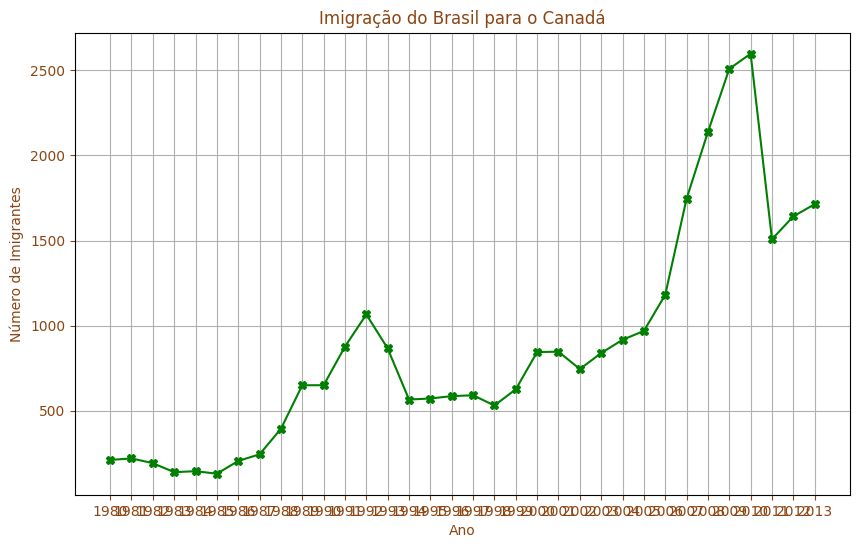

In [90]:
import matplotlib.pyplot as plt

# Supondo que 'america_sul' já esteja corretamente definido como um DataFrame filtrado pelos países da América do Sul
america_sul = df_ic[df_ic['Região'] == "América do Sul"]

# Criando uma figura e um eixo para o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os dados para o Brasil
ax.plot(america_sul.loc['Brasil', anos], color='green', marker='X')

# Configurando o título e os rótulos dos eixos
ax.set_title('Imigração do Brasil para o Canadá', color='saddlebrown')
ax.set_xlabel('Ano', color='saddlebrown')
ax.set_ylabel('Número de Imigrantes', color='saddlebrown')

# Ajustando as cores dos ticks
ax.tick_params(axis='x', colors='saddlebrown')
ax.tick_params(axis='y', colors='saddlebrown')

# Adicionando uma grade
ax.grid(True)

# Exibindo o gráfico
plt.show()

In [ ]:
# observação caso necessite mudar os ticks
# ax.xaxis.set_tick_params(labelsize=12)

### Mudando Várias Cores

Teoria da Cor
Psicologia da Cor
Gestalt
Fundamentos de Design
Documentação (Matplotlib e Seaborn (paletas) ou Adobe Color)